<a href="https://colab.research.google.com/github/j-on-son/Data/blob/master/Pandas_Handout.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np

In [14]:
# creating a Series from a list

a_list = [1, 2, 3, 4]
a_series = pd.Series(a_list)
a_series

0    1
1    2
2    3
3    4
dtype: int64

In [15]:
type(a_series)

pandas.core.series.Series

In [16]:
# returns a RangeIndex object with the start, stop, and step endpoints (stop is exclusive)

a_series.index

RangeIndex(start=0, stop=4, step=1)

In [17]:
# returns a np.array containing all of the values from the Series

a_series.values

array([1, 2, 3, 4])

In [18]:
# setting non-numeric indices to a Series

dates = ["2020-04-08", "2020-04-09", "2020-04-10", "2020-04-11"]
a_series = pd.Series(a_list, index = dates)
a_series

2020-04-08    1
2020-04-09    2
2020-04-10    3
2020-04-11    4
dtype: int64

In [19]:
# creating a Series using a dictionary

a_dict = dict(zip(dates, a_list))
print("Date dictionary: ", a_dict)
a_series = pd.Series(a_dict)
a_series

Date dictionary:  {'2020-04-08': 1, '2020-04-09': 2, '2020-04-10': 3, '2020-04-11': 4}


2020-04-08    1
2020-04-09    2
2020-04-10    3
2020-04-11    4
dtype: int64

In [20]:
# show the first 5 rows of the Series (default)

a_series = pd.Series({i : i ** 2 for i in range(100)})
a_series.head()

0     0
1     1
2     4
3     9
4    16
dtype: int64

In [21]:
# show the last 5 rows of the Series (default)

a_series.tail()

95    9025
96    9216
97    9409
98    9604
99    9801
dtype: int64

In [22]:
# show the first 10 rows of the Series

a_series.head(10)

0     0
1     1
2     4
3     9
4    16
5    25
6    36
7    49
8    64
9    81
dtype: int64

In [23]:
# returns number of elements in a Series

a_series.size

100

In [24]:
# returns the dtype of the elements in a Series

a_series.dtype

dtype('int64')

In [25]:
# selecting specific values using labels from a Series

a_series = pd.Series(data = [1, 2, 3, 4], index = dates)
a_series.loc['2020-04-08']

1

In [26]:
# selecting specific values using position from a Series

a_series.iloc[-1]

4

In [27]:
# selecting values without using .loc or .iloc from a Series (DOES NOT WORK FOR DATAFRAMES)

print("The value at position 0:", a_series[0])
a_series['2020-04-11']

The value at position 0: 1


4

In [28]:
# slicing a Series with position

a_series.iloc[:2]

2020-04-08    1
2020-04-09    2
dtype: int64

In [29]:
# slicing a Series with label

a_series.loc['2020-04-08':'2020-04-10']

2020-04-08    1
2020-04-09    2
2020-04-10    3
dtype: int64

In [30]:
# finding subset of Series with value less than 3

a_series[a_series < 3]

2020-04-08    1
2020-04-09    2
dtype: int64

In [31]:
# mutating values from a Series

a_series.loc["2020-04-08"] = -1 
a_series.iloc[1] = -2
a_series

2020-04-08   -1
2020-04-09   -2
2020-04-10    3
2020-04-11    4
dtype: int64

In [32]:
# appending new values to Series

a_series.loc["2020-04-12"] = 5 
a_series

2020-04-08   -1
2020-04-09   -2
2020-04-10    3
2020-04-11    4
2020-04-12    5
dtype: int64

In [33]:
# vectorized operations on Series

a_series = a_series * 2 
a_series

2020-04-08    -2
2020-04-09    -4
2020-04-10     6
2020-04-11     8
2020-04-12    10
dtype: int64

In [34]:
# replacing conditional values with np.where

print("array(",np.where(a_series < 0, 0, a_series), ")")

a_series.iloc[0::] = np.where(a_series < 0, 0, a_series) 
a_series

array( [ 0  0  6  8 10] )


2020-04-08     0
2020-04-09     0
2020-04-10     6
2020-04-11     8
2020-04-12    10
dtype: int64

In [35]:
# sorting a Series

a_series.sort_values(ascending = False)

2020-04-12    10
2020-04-11     8
2020-04-10     6
2020-04-09     0
2020-04-08     0
dtype: int64

In [36]:
# removing a value from a Series

a_series.drop('2020-04-08')

2020-04-09     0
2020-04-10     6
2020-04-11     8
2020-04-12    10
dtype: int64

In [37]:
# creating a DataFrame

grades = np.array([["Exam 1", "Exam 2", "Exam 3"], 
                   [      90,       87,       96], 
                   [      79,      100,       92], 
                   [      98,       60,       74]])
df = pd.DataFrame(data = grades)
df

,0,1,2
0,Exam 1,Exam 2,Exam 3
1,90,87,96
2,79,100,92
3,98,60,74


In [38]:
# assigning index and columns to a DataFrame

df = pd.DataFrame(data = grades[1:], columns = grades[0])
df

,Exam 1,Exam 2,Exam 3
0,90,87,96
1,79,100,92
2,98,60,74


In [39]:
# changing the index values of a DataFrame

names = ["George B.", "Calvin J.", "Chris P."]
df.index = names
df

,Exam 1,Exam 2,Exam 3
George B.,90,87,96
Calvin J.,79,100,92
Chris P.,98,60,74


In [40]:
# alternative way of changing the index values of a Dataframe

pd.DataFrame(data = grades[1:], columns = grades[0], index = names)

,Exam 1,Exam 2,Exam 3
George B.,90,87,96
Calvin J.,79,100,92
Chris P.,98,60,74


In [41]:
# creating a DataFrame from iterables and dictionaries

names = ["George B.", "Calvin J.", "Chris P."]
grades = {'Exam 1': [90, 79, 98],
          'Exam 2': [87, 100, 60],
          'Exam 3': [96, 92, 74]}
pd.DataFrame(data = grades, index = names)

,Exam 1,Exam 2,Exam 3
George B.,90,87,96
Calvin J.,79,100,92
Chris P.,98,60,74


In [42]:
# creating a DataFrame from nested dictionaries

grades = {'Exam 1':
                  {'George B.': 90, 'Calvin J.': 79, 'Chris P.': 98},
              'Exam 2': 
                 {'George B.': 87, 'Calvin J.': 100, 'Chris P.': 60},
              'Exam 3': 
                  {'George B.': 96, 'Calvin J.': 92, 'Chris P.': 74},
             }
df = pd.DataFrame(data = grades)
df

,Exam 1,Exam 2,Exam 3
George B.,90,87,96
Calvin J.,79,100,92
Chris P.,98,60,74


In [43]:
# showing the top 5 sections of a DataFrame

df = pd.DataFrame([[i**2, i**3] for i in range(100)], columns = ['x**2', 'x**3'])
df.head()

,x**2,x**3
0,0,0
1,1,1
2,4,8
3,9,27
4,16,64


In [44]:
# showing the last 10 sections of a DataFrame

df.tail(10)

,x**2,x**3
90,8100,729000
91,8281,753571
92,8464,778688
93,8649,804357
94,8836,830584
95,9025,857375
96,9216,884736
97,9409,912673
98,9604,941192
99,9801,970299


In [45]:
# finding the shape of a DataFrame

df.shape

(100, 2)

In [46]:
# finding the size of a DataFrame

df.size

200

In [47]:
# showing the dtypes of values from each column of a DataFrame

df.dtypes

x**2    int64
x**3    int64
dtype: object

In [48]:
# displaying summary statistics of a DataFrame

df.describe()

,x**2,x**3
count,100.000000,100.000000
mean,3283.500000,245025.000000
std,2968.174804,280457.581671
min,0.000000,0.000000
25%,612.750000,15174.750000
50%,2450.500000,121324.500000
75%,5513.250000,409386.750000
max,9801.000000,970299.000000


In [49]:
# selecting specific data from a DataFrame

df = pd.DataFrame(data = [["CS2316", 150, 3.15],
                          ["CS1331", 900, 2.91],                    
                          ["ISyE2027",200,2.86],
                          ["ISyE2028",200, 3.11],
                          ["MATH2603", 150, 3.17]],
                  columns = ["Course", "Enrollment", "Avg_GPA"])
df

,Course,Enrollment,Avg_GPA
0,CS2316,150,3.15
1,CS1331,900,2.91
2,ISyE2027,200,2.86
3,ISyE2028,200,3.11
4,MATH2603,150,3.17


In [50]:
# selecting a single column (returns a Series)

df["Course"]

0      CS2316
1      CS1331
2    ISyE2027
3    ISyE2028
4    MATH2603
Name: Course, dtype: object

In [51]:
type(df["Course"])

pandas.core.series.Series

In [52]:
# selecting multiple columns (returns a DataFrame)

df[["Course", "Avg_GPA"]]

,Course,Avg_GPA
0,CS2316,3.15
1,CS1331,2.91
2,ISyE2027,2.86
3,ISyE2028,3.11
4,MATH2603,3.17


In [53]:
type(df[["Course", "Avg_GPA"]])

pandas.core.frame.DataFrame

In [54]:
# setting a column as the index for a DataFrame

df.set_index("Course", inplace = True)
df

,Enrollment,Avg_GPA
Course,,
CS2316,150,3.15
CS1331,900,2.91
ISyE2027,200,2.86
ISyE2028,200,3.11
MATH2603,150,3.17


In [55]:
# selecting specific row from DataFrame with .loc

df.loc["ISyE2027"]

Enrollment    200.00
Avg_GPA         2.86
Name: ISyE2027, dtype: float64

In [56]:
# selecting specific row from DataFrame with .iloc

df.iloc[2:4, :]

,Enrollment,Avg_GPA
Course,,
ISyE2027,200,2.86
ISyE2028,200,3.11


In [57]:
# selecting specific value from DataFrame with .loc

df.loc["ISyE2027", "Avg_GPA"]

2.86

In [58]:
# selecting specific value from DataFrame with .iloc

df.iloc[2, -1]

2.86

In [59]:
# selecting specific rows and values from Dataframe with .loc

df.loc["ISyE2027":"ISyE2028", "Enrollment"]


Course
ISyE2027    200
ISyE2028    200
Name: Enrollment, dtype: int64

In [60]:
# masking to find enrollment greater than 150 and avg GPA less than 3

df[df["Enrollment"] > 150]

,Enrollment,Avg_GPA
Course,,
CS1331,900,2.91
ISyE2027,200,2.86
ISyE2028,200,3.11


In [61]:
df[df["Avg_GPA"] < 3]

,Enrollment,Avg_GPA
Course,,
CS1331,900,2.91
ISyE2027,200,2.86


In [62]:
# result

df[(df["Enrollment"] > 150) & (df["Avg_GPA"] < 3)]

,Enrollment,Avg_GPA
Course,,
CS1331,900,2.91
ISyE2027,200,2.86


In [63]:
# using .isin to find specific rows with DataFrame

df[df.index.isin(["ISyE2027", "ISyE2028"])]

,Enrollment,Avg_GPA
Course,,
ISyE2027,200,2.86
ISyE2028,200,3.11


In [64]:
# mutating values in a DataFrame

df.loc["CS1331", "Enrollment"] = 850
df

,Enrollment,Avg_GPA
Course,,
CS2316,150,3.15
CS1331,850,2.91
ISyE2027,200,2.86
ISyE2028,200,3.11
MATH2603,150,3.17


In [65]:
# changing all the values within the "MATH2603" row

df.iloc[-1, :] = [100, 3.15]
df

,Enrollment,Avg_GPA
Course,,
CS2316,150,3.15
CS1331,850,2.91
ISyE2027,200,2.86
ISyE2028,200,3.11
MATH2603,100,3.15


In [66]:
# creating a new column of True and False

df["Large"] = df["Enrollment"] >= 200
df

,Enrollment,Avg_GPA,Large
Course,,,
CS2316,150,3.15,False
CS1331,850,2.91,True
ISyE2027,200,2.86,True
ISyE2028,200,3.11,True
MATH2603,100,3.15,False


In [67]:
# converting value types

df["Large"] = df["Large"].astype(int)
df

,Enrollment,Avg_GPA,Large
Course,,,
CS2316,150,3.15,0
CS1331,850,2.91,1
ISyE2027,200,2.86,1
ISyE2028,200,3.11,1
MATH2603,100,3.15,0


In [68]:
# sorting a DataFrame by "Avg_GPA"

df.sort_values(by = "Avg_GPA", ascending = False)
df

,Enrollment,Avg_GPA,Large
Course,,,
CS2316,150,3.15,0
CS1331,850,2.91,1
ISyE2027,200,2.86,1
ISyE2028,200,3.11,1
MATH2603,100,3.15,0


In [69]:
# removing the "Large" column

df.drop(["Large"], axis = 1)

,Enrollment,Avg_GPA
Course,,
CS2316,150,3.15
CS1331,850,2.91
ISyE2027,200,2.86
ISyE2028,200,3.11
MATH2603,100,3.15


In [70]:
# removing "CS2316" and "CS1331" rows

df.drop(["CS2316", "CS1331"], axis = 0)

,Enrollment,Avg_GPA,Large
Course,,,
ISyE2027,200,2.86,1
ISyE2028,200,3.11,1
MATH2603,100,3.15,0


In [71]:
# Creating a DataFrame with missing data

df.loc["CS2803"] = [50, np.nan, 0]
df.loc["ISyE3803"] = [50, np.nan, 0]
df

,Enrollment,Avg_GPA,Large
Course,,,
CS2316,150.0,3.15,0.0
CS1331,850.0,2.91,1.0
ISyE2027,200.0,2.86,1.0
ISyE2028,200.0,3.11,1.0
MATH2603,100.0,3.15,0.0
CS2803,50.0,NaN,0.0
ISyE3803,50.0,NaN,0.0


In [72]:
# removing all the rows that contain NaN

df.dropna()

,Enrollment,Avg_GPA,Large
Course,,,
CS2316,150.0,3.15,0.0
CS1331,850.0,2.91,1.0
ISyE2027,200.0,2.86,1.0
ISyE2028,200.0,3.11,1.0
MATH2603,100.0,3.15,0.0


In [73]:
# replacing all NaN values with 0

df.fillna(0)

,Enrollment,Avg_GPA,Large
Course,,,
CS2316,150.0,3.15,0.0
CS1331,850.0,2.91,1.0
ISyE2027,200.0,2.86,1.0
ISyE2028,200.0,3.11,1.0
MATH2603,100.0,3.15,0.0
CS2803,50.0,0.00,0.0
ISyE3803,50.0,0.00,0.0


In [74]:
# check if values are NaN

pd.isna(df)

,Enrollment,Avg_GPA,Large
Course,,,
CS2316,False,False,False
CS1331,False,False,False
ISyE2027,False,False,False
ISyE2028,False,False,False
MATH2603,False,False,False
CS2803,False,True,False
ISyE3803,False,True,False


In [75]:
# reading data from a CSV to Pandas

# reading courses.csv

course_url = 'https://raw.githubusercontent.com/j-on-son/Data/master/CS2316_Fall2019/courses.csv'

courses = pd.read_csv(course_url, delimiter = ',', index_col = 0)
courses

,Enrollment,Avg_GPA,Large
Course,,,
CS2316,150.0,3.15,0.0
CS1331,850.0,2.91,1.0
ISyE2027,200.0,2.86,1.0
ISyE2028,200.0,3.11,1.0
MATH2603,100.0,3.15,0.0
CS2803,50.0,NaN,0.0
ISyE3803,50.0,NaN,0.0


In [76]:
# reading an excel file with pd.read_excel

url = 'https://github.com/j-on-son/Data/blob/master/CS2316_Fall2019/HW10/olympics.xlsx?raw=true'

countries = pd.read_excel(url, sheet_name = 'dictionary')
countries.head()

,Country,Code,Population,GDP
0,Afghanistan,AFG,32526562.0,1.933129e+10
1,Albania,ALB,2889167.0,1.139839e+10
2,Algeria,ALG,39666519.0,1.668386e+11
3,American Samoa*,ASA,55538.0,NaN
4,Andorra,AND,70473.0,NaN


In [77]:
summer = pd.read_excel(url, sheet_name = 'summer', header = 1)
summer.head()

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
0,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold
1,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,Silver
2,1896,Athens,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze
3,1896,Athens,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold
4,1896,Athens,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100M Freestyle For Sailors,Silver


In [78]:
# reading an excel file with pd.ExcelFile

fin = pd.ExcelFile(url)
countres = fin.parse(sheet_name = 'dictionary')
countries.head()

,Country,Code,Population,GDP
0,Afghanistan,AFG,32526562.0,1.933129e+10
1,Albania,ALB,2889167.0,1.139839e+10
2,Algeria,ALG,39666519.0,1.668386e+11
3,American Samoa*,ASA,55538.0,NaN
4,Andorra,AND,70473.0,NaN


In [0]:
# writing to a CSV file

courses.to_csv("output.csv", index = True)
 # writes the following to "output.csv":

# Course,Enrollment,Avg_GPA,Large
# CS2316,150.0,3.15,0.0
# CS1331,850.0,2.91,1.0
# ISyE2027,200.0,2.86,1.0
# ISyE2028,200.0,3.11,1.0
# MATH2603,100.0,3.15,0.0
# CS2803,50.0,,0.0
# ISyE3803,50.0,,0.0

In [0]:
# writing to a Excel file

# first, create a writer object

writer = pd.ExcelWriter("output.xlsx")

# use df.to_excel() to write to an excel file

summer.to_excel(writer)

# you can add multiple sheets at once

countries.to_excel(writer, sheet_name = "dictionary")
summer.to_excel(writer, sheet_name = "summer")

In [81]:
# doing operations on DataFrames

# for the following examples, we will use the following DataFrame

grades = {
              'Exam 1': \
                  {'George B.': 90, 'Calvin J.': 79, 'Chris P.': 98},\
              'Exam 2': \
                 {'George B.': 87, 'Calvin J.': 100, 'Chris P.': 60},\
              'Exam 3': \
                  {'George B.': 96, 'Calvin J.': 92, 'Chris P.': 74},\
         }
grades = pd.DataFrame(data = grades)
grades

,Exam 1,Exam 2,Exam 3
George B.,90,87,96
Calvin J.,79,100,92
Chris P.,98,60,74


In [82]:
# you can apply aggregate functions to DataFrames

# the following finds the mean of each row

grades["Final Grade"] = grades.mean(axis = 1).round(2)
grades

,Exam 1,Exam 2,Exam 3,Final Grade
George B.,90,87,96,91.00
Calvin J.,79,100,92,90.33
Chris P.,98,60,74,77.33


In [83]:
# computing the average for all columns

grades.loc["Average Grade"] = grades.mean(axis=0).round(2)
grades

,Exam 1,Exam 2,Exam 3,Final Grade
George B.,90.0,87.00,96.00,91.00
Calvin J.,79.0,100.00,92.00,90.33
Chris P.,98.0,60.00,74.00,77.33
Average Grade,89.0,82.33,87.33,86.22


In [84]:
# you can use .apply function to perform manipulations to DataFrames

# for example, let's create a function for us to use

def letter_grade(final_grade):
  if final_grade >= 90:
    return "A"
  elif final_grade >= 80: 
    return "B"
  elif final_grade >= 70: 
    return "C"
  elif final_grade >= 60: 
    return "D"
  return "F"

# we can now apply our letter_grade() function to .apply

grades["Letter Grade"] = grades.apply(lambda x : letter_grade(x["Final Grade"]), axis = 1)
grades

,Exam 1,Exam 2,Exam 3,Final Grade,Letter Grade
George B.,90.0,87.00,96.00,91.00,A
Calvin J.,79.0,100.00,92.00,90.33,A
Chris P.,98.0,60.00,74.00,77.33,C
Average Grade,89.0,82.33,87.33,86.22,B


In [85]:
# we can compute the frequency with each letter grade with .value_counts()

grades["Letter Grade"].value_counts()

A    2
C    1
B    1
Name: Letter Grade, dtype: int64

In [86]:
# you can reset the index of a DataFrame

grades = grades.reset_index()
grades.columns

Index(['index', 'Exam 1', 'Exam 2', 'Exam 3', 'Final Grade', 'Letter Grade'], dtype='object')

In [87]:
# renames the columns

grades.rename(columns = {"index" : "Name"}, inplace = True)
grades

,Name,Exam 1,Exam 2,Exam 3,Final Grade,Letter Grade
0,George B.,90.0,87.00,96.00,91.00,A
1,Calvin J.,79.0,100.00,92.00,90.33,A
2,Chris P.,98.0,60.00,74.00,77.33,C
3,Average Grade,89.0,82.33,87.33,86.22,B


In [88]:
# how to use string methods on DataFrames

grades['Name'].str.split(" ")

0        [George, B.]
1        [Calvin, J.]
2         [Chris, P.]
3    [Average, Grade]
Name: Name, dtype: object

In [89]:
# Notice that each value is now a list within the Series values which isn’t exactly what we wanted. We do the following

names = grades["Name"].str.split(" ", expand = True)
names

,0,1
0,George,B.
1,Calvin,J.
2,Chris,P.
3,Average,Grade


In [90]:
# we can replace string values

names[1] = names[1].str.replace(r"\.","")
names

,0,1
0,George,B
1,Calvin,J
2,Chris,P
3,Average,Grade


In [91]:
# create the "First Name" and "Last Name" columns to the DataFrame

grades["First Name"], grades["Last Name"] = names.values.T
grades

,Name,Exam 1,Exam 2,Exam 3,Final Grade,Letter Grade,First Name,Last Name
0,George B.,90.0,87.00,96.00,91.00,A,George,B
1,Calvin J.,79.0,100.00,92.00,90.33,A,Calvin,J
2,Chris P.,98.0,60.00,74.00,77.33,C,Chris,P
3,Average Grade,89.0,82.33,87.33,86.22,B,Average,Grade


In [92]:
# you can also perform groupby operations on DataFrames

# here is our DataFrame

summer.columns

Index(['Year', 'City', 'Sport', 'Discipline', 'Athlete', 'Country', 'Gender',
       'Event', 'Medal'],
      dtype='object')

In [93]:
summer.head()

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
0,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold
1,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,Silver
2,1896,Athens,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze
3,1896,Athens,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold
4,1896,Athens,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100M Freestyle For Sailors,Silver


In [94]:
# we can group by "Country" first, and then find all the medal counts for each country

total_medals = summer.groupby("Country")["Medal"].count()

total_medals.sort_values(ascending = False)

Country
USA    4585
URS    2049
GBR    1720
FRA    1396
GER    1305
       ... 
GUY       1
GUA       1
DJI       1
GRN       1
BRN       1
Name: Medal, Length: 147, dtype: int64

In [95]:
# groupby with multiple columns

total_medals = summer.groupby(["Country","Gender"])["Medal"].count()
total_medals.iloc[35:40]

Country  Gender
CHI      Men        32
         Women       1
CHN      Men       270
         Women     537
CIV      Men         1
Name: Medal, dtype: int64

In [96]:
# sort in descending orderr

total_medals.sort_values(ascending = False)

Country  Gender
USA      Men       3208
URS      Men       1476
GBR      Men       1412
USA      Women     1377
FRA      Men       1254
                   ... 
BRN      Women        1
SIN      Men          1
BOT      Men          1
BOH      Women        1
GAB      Men          1
Name: Medal, Length: 236, dtype: int64

In [97]:
# find the average number of medals for each gender using the previous total_medals DataFrame

df = total_medals.reset_index()
df

,Country,Gender,Medal
0,AFG,Men,2
1,AHO,Men,1
2,ALG,Men,12
3,ALG,Women,3
4,ANZ,Men,27
...,...,...,...
231,YUG,Women,62
232,ZAM,Men,2
233,ZIM,Women,23
234,ZZX,Men,45


In [98]:
df.groupby("Gender")["Medal"].mean()

Gender
Men      161.304965
Women     88.600000
Name: Medal, dtype: float64

In [99]:
# find the average number of medals for each gender as well as the total number of countries represented by each gender

df.groupby("Gender").aggregate({"Medal":"mean", "Country" : "count"})

,Medal,Country
Gender,,
Men,161.304965,141
Women,88.600000,95


In [100]:
# concatenating lists for a DataFrame

dfs = []
for day in range(1, 32):
  day = str(day) if day > 9 else "0" + str(day)
  URL = f"https://raw.githubusercontent.com/j-on-son/Data/master/ISyE3803/Relay%20Bikes/March%20Data%20for%20rentals%20in%20vs.%20out%20by%20station/hub_stats_relay_bike_share_03_{day}_2018-03_{day}_2018.csv"
  df = pd.read_csv(URL)
  df["Day"] = day
  dfs.append(df)

pd.concat(dfs, axis = 0)

,Name,Rentals total,Rentals out,Rentals in,00:00 - 11:00 out,00:00 - 11:00 in,11:00 - 15:00 out,11:00 - 15:00 in,15:00 - 19:00 out,15:00 - 19:00 in,19:00 - 23:59 out,19:00 - 23:59 in,Time low [%],Time full [%],Median bikes,Day
0,VIRTUAL HUB - ATLANTA BICYCLE COALITION,0,0,0,0,0,0,0,0,0,0,0,0.00,100.0,0.0,01
1,VIRTUAL HUB - CANDLER PARK,0,0,0,0,0,0,0,0,0,0,0,0.00,0.0,0.0,01
2,VIRTUAL HUB - BROWNWOOD PARK RECREATION CENTER,0,0,0,0,0,0,0,0,0,0,0,0.00,0.0,0.0,01
3,TWO WHEEL VALET-CARE WALK IN HER SHOES- VIRTUA...,0,0,0,0,0,0,0,0,0,0,0,0.00,0.0,0.0,01
4,BROAD & MITCHELL,0,0,0,0,0,0,0,0,0,0,0,0.00,0.0,2.0,01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118,VIRGINIA-HIGHLAND,13,7,6,0,1,4,1,3,4,0,0,6.14,0.0,3.5,31
119,INMAN PARK VILLAGE,2,0,2,0,0,0,0,0,2,0,0,0.00,0.0,2.5,31
120,GRANT PARK,8,4,4,0,0,3,1,1,3,0,0,0.00,0.0,9.0,31
121,HIGHLAND - FREEDOM TRAIL,13,8,5,0,0,3,1,5,2,0,2,0.00,58.0,7.0,31


In [101]:
# in the example below we will show how to perform an inner join on the courses DataFrame defined previously

a = pd.Series([0, 1, 2, 3, 4, 5, 6])
df = courses.reset_index()
df

,Course,Enrollment,Avg_GPA,Large
0,CS2316,150.0,3.15,0.0
1,CS1331,850.0,2.91,1.0
2,ISyE2027,200.0,2.86,1.0
3,ISyE2028,200.0,3.11,1.0
4,MATH2603,100.0,3.15,0.0
5,CS2803,50.0,NaN,0.0
6,ISyE3803,50.0,NaN,0.0


In [102]:
# First let’s construct a department column using material we learned previously

df["Department"] = df["Course"].str.replace(r"\d{4}","")
df

,Course,Enrollment,Avg_GPA,Large,Department
0,CS2316,150.0,3.15,0.0,CS
1,CS1331,850.0,2.91,1.0,CS
2,ISyE2027,200.0,2.86,1.0,ISyE
3,ISyE2028,200.0,3.11,1.0,ISyE
4,MATH2603,100.0,3.15,0.0,MATH
5,CS2803,50.0,NaN,0.0,CS
6,ISyE3803,50.0,NaN,0.0,ISyE


In [103]:
# now suppose we have a DataFrame mapping the department abbreviation to the department name and enrollment

departments = pd.DataFrame({'Department': {'CS': 'Computer Science',
  'ISyE': 'Industrial and Systems Engineering',
  'MATH': 'Mathematics'},
 'Total Enrollment': {'CS': 4000, 'ISyE': 1500, 'MATH': 900}}
)
departments

,Department,Total Enrollment
CS,Computer Science,4000
ISyE,Industrial and Systems Engineering,1500
MATH,Mathematics,900


In [104]:
# Every Pandas Series and DataFrame has the .plot method which is used to visualize patterns in the data. The parameters of interest are x, y, and kind. 
# Below we will highlight some of the basic plots that may be helpful for simple data visualization. 
# But first, let’s define a Series with uniformly distributed random values indexed by dates

aSeries = pd.Series(index = pd.date_range("20200408", periods = 10), data = np.random.randint(1,7, 10))
aSeries

2020-04-08    5
2020-04-09    4
2020-04-10    5
2020-04-11    1
2020-04-12    6
2020-04-13    4
2020-04-14    5
2020-04-15    3
2020-04-16    6
2020-04-17    6
Freq: D, dtype: int64

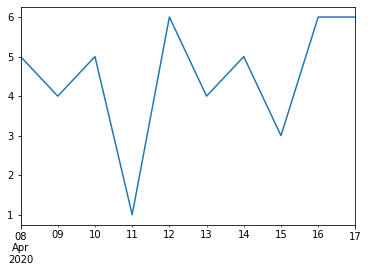

In [105]:
# plotting lines

aSeries.plot(x = aSeries.index, y = aSeries.values)

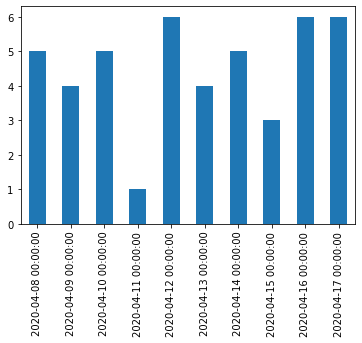

In [106]:
# plotting bars

aSeries.plot(x = aSeries.index, y = aSeries.values, kind="bar")

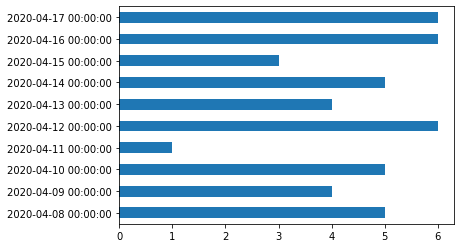

In [107]:
# plotting horizontal bars

aSeries.plot(x = aSeries.index, y = aSeries.values, kind="barh")

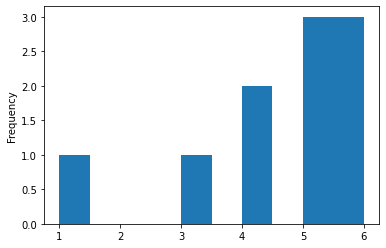

In [108]:
# plotting histograms

aSeries.plot(x = aSeries.index, y = aSeries.values, kind="hist")

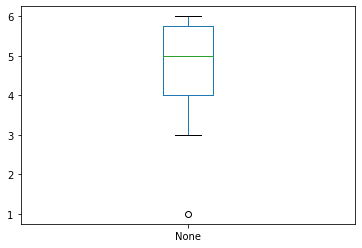

In [109]:
# plotting box-and-whiskers

aSeries.plot(x = aSeries.index, y = aSeries.values, kind="box")

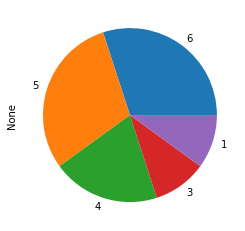

In [110]:
# plotting pie graphs

percent_occurances = aSeries.value_counts()/10 * 100
percent_occurances.plot(kind = "pie")